In [215]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [216]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)

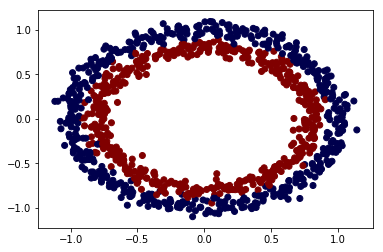

In [217]:
plt.scatter(X[:,0],X[:,1], c=y, cmap='seismic')

[[ 0.00162808  0.          0.00083761 ... -0.         -0.
   0.        ]
 [-0.00066671  0.         -0.00157894 ... -0.          0.
  -0.        ]]


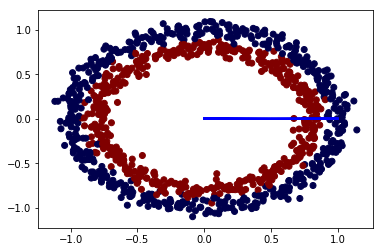

In [230]:
class LinearClassifier:
#     def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
#         self.lr = lr
#         self.num_iter = num_iter
#         self.fit_intercept = fit_intercept
#         self.verbose = verbose
    
#     def __add_intercept(self, X):
#         intercept = np.ones((X.shape[0], 1))
#         return np.concatenate((intercept, X), axis=1)
    
#     def __sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))
#     def __loss(self, h, y):
#         return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        pseudo_inverse = np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T)
        self.w = np.matmul(pseudo_inverse, y)
        print(self.w)
    
    
    def predict_prob(self, X):
        return
    
    def predict(self, X, threshold=0.5):
        return X * self.w
    
    def plot(self, X, Y):
        x = np.linspace(X.min(), X.max(), len(X))
        y = self.w[1]*x + self.w[0]
        
        plt.scatter(X[:,0],X[:,1], c=Y, cmap='seismic')
        plt.plot(x, y, color='blue')
    
clf = LinearClassifier()
clf.fit(X, y)
clf.plot(X, y)
#plotting values 


The accuracy score is dissapointing as the dataset is not linearly seperable. We will attempt to improve the accuracy score by creating a new feature by applying a linear transformation

[[ 1.75192602e-03  0.00000000e+00 -9.99682453e-05 ... -0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [-3.03659602e-04  0.00000000e+00  1.60409686e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[-8.98785579 -9.10496751]]


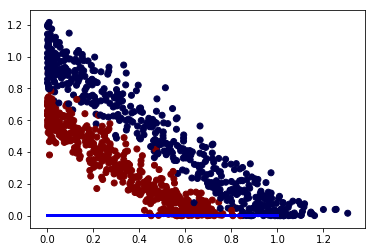

In [233]:
X2 = X * X
clf2 = LinearClassifier()
clf2.fit(X2, y)
clf2.plot(X2, y)

clf3 = LogisticRegression()
clf3.fit(X2, y)
print(clf3.coef_)


In [226]:
x0_mean = X[:,0].mean()
x1_mean = X[:,1].mean()
distance_from_mean = np.sqrt(abs(X[:,0] - x0_mean)) +  np.sqrt(abs(X[:,1] - x1_mean))

In [241]:
X_new = X * X


[[ 1.75192602e-03  0.00000000e+00 -9.99682453e-05 ... -0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [-3.03659602e-04  0.00000000e+00  1.60409686e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


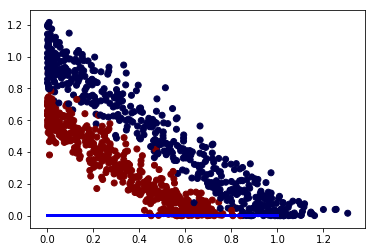

In [242]:
clf = LinearClassifier()
clf.fit(X_new, y)
clf.plot(X_new, y)

new feature improved accuracy

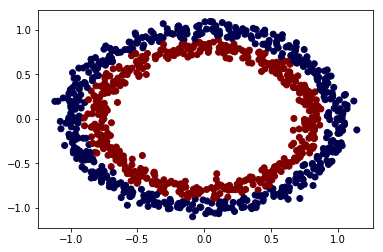

0.977


In [245]:
clf = LogisticRegression()
clf.fit(X2, y)
y_pred = clf.predict(X2)
plt.scatter(X[:,0],X[:,1], c=y_pred, cmap='seismic')
plt.show()
print(accuracy_score(y_pred, y))